<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Data-Science/Deep%20Learning/from%20directory/Fruits360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
!kaggle datasets download -d moltean/fruits

 98% 718M/732M [00:06<00:00, 113MB/s]
100% 732M/732M [00:06<00:00, 116MB/s]


In [ ]:
!ls

flowers  fruits.zip  kaggle.json  test	train  validation


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tangelo/r_16_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_17_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_181_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_182_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_183_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_184_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_185_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_186_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_187_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_188_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_189_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_18_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_190_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_191_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_192_100.jpg  
  inflating: fruits-360/Training/Tangelo/r_193_100.jpg  
  inflating: fruits-360/Training/Tangelo

In [ ]:
pwd

'/content/gdrive/My Drive/kaggle'

In [ ]:
ls

flowers/  fruits-360/  kaggle.json  readme.md  test/  train/  validation/


**IMPORT**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Get the data directory

datadir = str('/content/gdrive/My Drive/kaggle/fruits-360')
train_dir = str('/content/gdrive/My Drive/kaggle/fruits-360/Training')
test_dir = str('/content/gdrive/My Drive/kaggle/fruits-360/Test')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#we have to use the same datagen for noth validation and train dataset since they are from the same directory
#But we can't use Data Augmentation for validation sets

datagen = dict(rescale = 1./255, validation_split= 0.1)
img_shape = (100,100)

In [ ]:
valid_datagen = ImageDataGenerator(**datagen)

valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    subset = 'validation',
    shuffle = True,
    target_size = img_shape,
)

Found 6019 images belonging to 120 classes.


In [ ]:
train_datagen = ImageDataGenerator(**datagen)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    subset = 'training',
    shuffle = True,
    target_size = img_shape,
)

Found 54467 images belonging to 120 classes.


**MODEL**

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding='same',activation='relu',kernel_initializer='he_uniform', input_shape = [100, 100, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same',kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(120, activation = 'softmax'),
                    ])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
import numpy as np
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps, validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
1703/1703 [==============================] - 144s 85ms/step - loss: 0.4493 - accuracy: 0.8842 - val_loss: 0.1034 - val_accuracy: 0.9698
Epoch 2/20
1703/1703 [==============================] - 141s 83ms/step - loss: 0.0451 - accuracy: 0.9873 - val_loss: 0.0815 - val_accuracy: 0.9761
Epoch 3/20
1703/1703 [==============================] - 142s 84ms/step - loss: 0.0319 - accuracy: 0.9911 - val_loss: 0.0633 - val_accuracy: 0.9869
Epoch 4/20
1703/1703 [==============================] - 140s 82ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.0330 - val_accuracy: 0.9934
Epoch 5/20
1703/1703 [==============================] - 140s 82ms/step - loss: 0.0181 - accuracy: 0.9951 - val_loss: 0.0981 - val_accuracy: 0.9786
Epoch 6/20
1703/1703 [==============================] - 141s 83ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.2076 - val_accuracy: 0.9736
Epoch 7/20
1703/1703 [==============================] - 139s 81ms/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0

(0.0, 1.0)

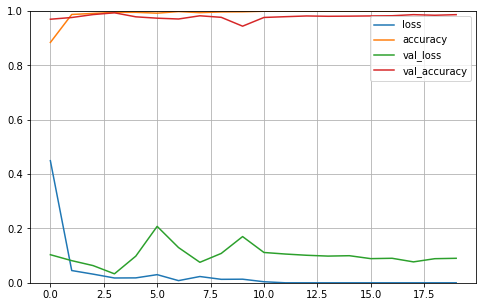

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
#Let's get our test evaluation
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle = True,
    target_size = img_shape,
)

Found 20618 images belonging to 120 classes.


In [ ]:
test_steps = np.ceil(train_generator.samples/train_generator.batch_size)
test_loss, test_acc = model.evaluate_generator(test_generator, steps = test_steps)
print('test acc:', test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.9835451245307922


In [ ]:
test_loss

0.14258401095867157

**VIEWING WHAT CONVNET LEARNT**

In [ ]:
img_path = '/content/gdrive/My Drive/kaggle/fruits-360/Test/Apple Braeburn/3_100.jpg'
from keras.preprocessing import image

#preprocess the image into 4d tensors
img = image.load_img(img_path, target_size = (100,100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis =0)
img_tensor /= 255.

In [ ]:
img_tensor.shape

(1, 100, 100, 3)

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
activations[7].shape

(1, 6, 6, 64)

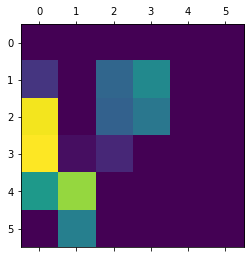

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(activations[7][0, :, :, 4], cmap='viridis')

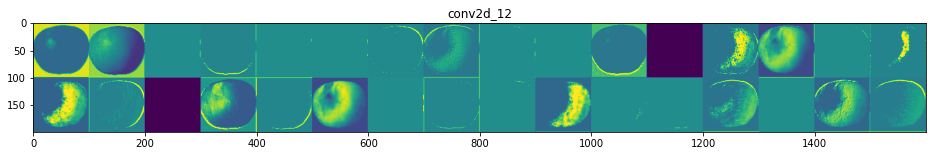

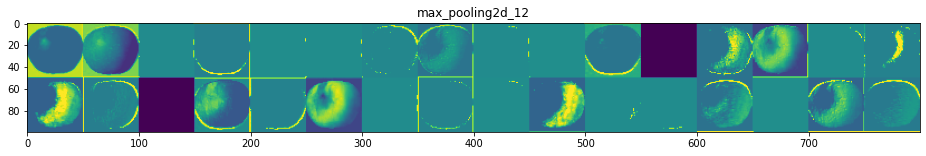

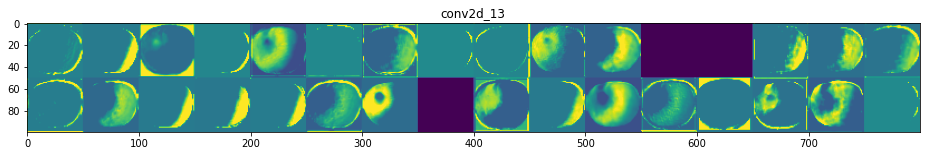

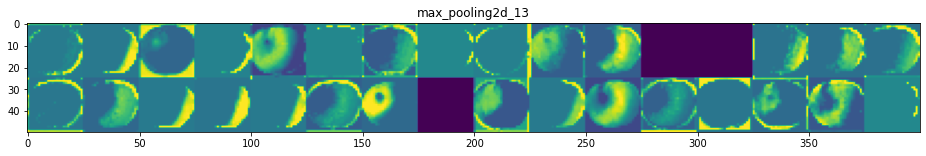

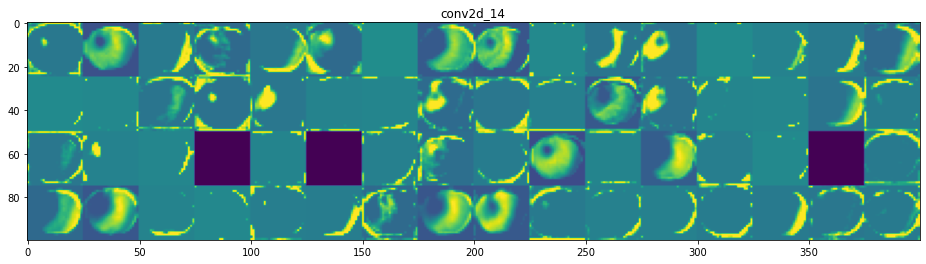

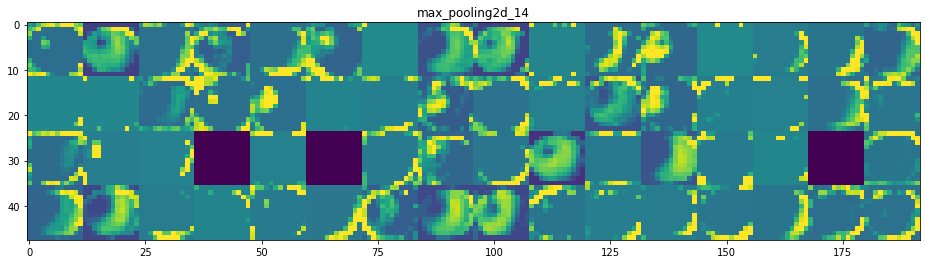

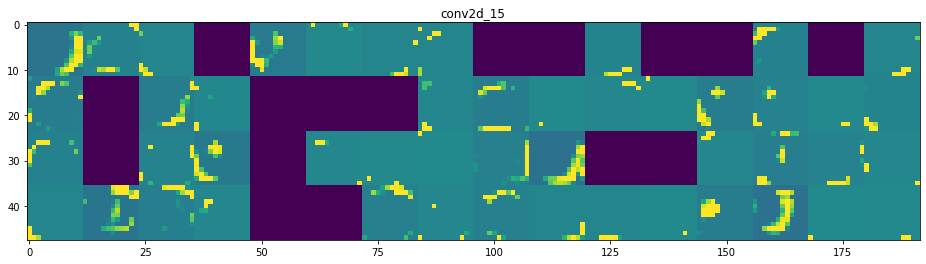

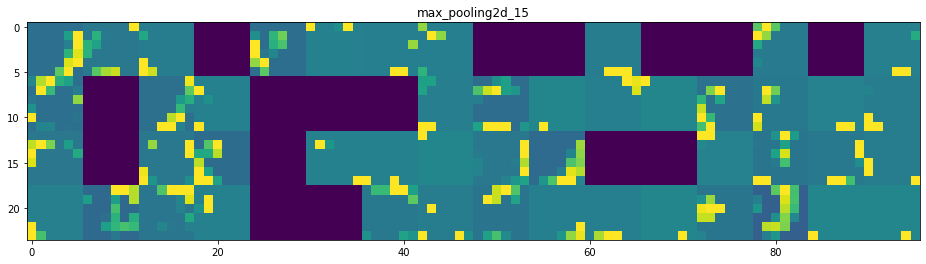

In [ ]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :,col * images_per_row + row]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
  scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
preds = model.predict(img_tensor)

In [ ]:
np.argmax(preds[0])

0

In [ ]:
apple_output = model.output[:, 0]
last_conv_layer = model.get_layer('conv2d_15')

In [ ]:
from keras import backend as K

grads = K.gradients(apple_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input],
[pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([img_tensor])
for i in range(64):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

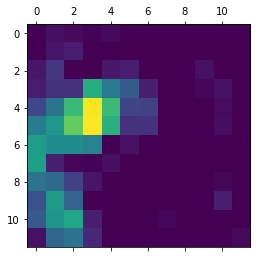

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [ ]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('/content/gdrive/My Drive/kaggle/fruits-360/Test/3_100.jpg', superimposed_img)

True